# Declaration of Originality

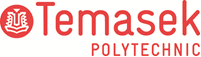

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : XAVIER WONG SHU CAN (2404733D)
* Tutorial Group                : P04
* Tutor						    : EMILE SABASTIAN
* Submission Date               : 11/2/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

<h2>Table of Contents</h2>

<ul>
  <li>Declaration of Originality</li>

  <li>1. Business Understanding</li>

  <li>2. Data Understanding
    <ul>
      <li>2.1 Load dataset
        <ul>
          <li>2.1.1 Understanding the columns</li>
        </ul>
      </li>
      <li>2.2 Summary Statistics</li>
      <li>2.3 Data Visualization
        <ul>
          <li>2.3.1 Understanding distribution of data
            <ul>
              <li>2.3.1.1 Understanding distribution of target</li>
              <li>2.3.1.2 Understanding distribution of features</li>
            </ul>
          </li>
          <li>2.3.2 Understanding relationship between variables</li>
        </ul>
      </li>
    </ul>
  </li>

  <li>3. Data Preparation
    <ul>
      <li>3.1 Data Cleaning</li>
      <li>3.2 Train-Test Split</li>
    </ul>
  </li>

  <li>4. Modelling
    <ul>
      <li>4.1 Train Model</li>
    </ul>
  </li>

  <li>5. Model Evaluation
    <ul>
      <li>5.1 Testing on new data</li>
      <li>5.2 Conclusion for baseline model</li>
    </ul>
  </li>

  <li>6. Iterative model development
    <ul>
      <li>6.1 Iteration 1 - Creating new features (Feature Engineering)
        <ul>
          <li>6.1.1 Iteration 1 - Finding the best parameters (Hyperparameters Tuning)</li>
        </ul>
      </li>
      <li>6.2 Iteration 2 – Model Training Using Aggregated Feature-Engineered Variables (Original Semester Features Removed)
        <ul>
          <li>6.2.1 Iteration 2 – Hyperparameter Tuning After Removing Original Semester-Level Features</li>
        </ul>
      </li>
      <li>6.3 Iteration 3 - Converting the Multiclass Target into a Binary Dropout Target</li>
      <li>6.4 Iteration 4 - Training the Final Binary Dropout Model Using Selected Features and Tuned Hyperparameters</li>
    </ul>
  </li>

  <li>7. Conclusion</li>
</ul>


<h1 style="text-align: left; color: #1f77b4;"><strong>Libraries

In [218]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from scipy import stats

<h1 style="text-align: left; color: #1f77b4;"><strong>1. Business Understanding</strong></h1>

<h5 style="text-align: left">The goal of this model is to support educational institutions such as ITE and Polytechnics in identifying students who may be at risk of dropping out after their first or second semester. By analysing early academic and related indicators, the model provides a high-level assessment to help institutions better understand potential dropout risk. This solution serves as an early indicator that can support lecturers or care personnel in planning appropriate follow-up actions.</h5>

<h1 style="text-align: left; color: #1f77b4;"><strong>2. Data Understanding

<h3 style="text-align: left; color: #1f77b4;">2.1 Load dataset

In [219]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "dataset.csv"
df = pd.read_csv(FILE_PATH)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


<h3 style="text-align: left; color: #1f77b4;">2.1.1 Understanding the columns

<table border="1" cellpadding="6" cellspacing="0" style="border-collapse: collapse; width: 100%;">
  <thead style="background-color:#ff7d99;">
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Marital status</td>
      <td>Student’s marital status. (Categorical)</td>
    </tr>
    <tr>
      <td>Application mode</td>
      <td>Application pathway used. (Categorical)</td>
    </tr>
    <tr>
      <td>Application order</td>
      <td>Order of application submission. (Numerical)</td>
    </tr>
    <tr>
      <td>Course</td>
      <td>Academic programme enrolled. (Categorical)</td>
    </tr>
    <tr>
      <td>Daytime/evening attendance</td>
      <td>Daytime or evening classes. (Categorical)</td>
    </tr>
    <tr>
      <td>Previous qualification</td>
      <td>Highest qualification before enrollment. (Categorical)</td>
    </tr>
    <tr>
      <td>Nationality</td>
      <td>Student nationality. (Categorical)</td>
    </tr>
    <tr>
      <td>Mother's qualification</td>
      <td>Mother’s highest qualification. (Categorical)</td>
    </tr>
    <tr>
      <td>Father's qualification</td>
      <td>Father’s highest qualification. (Categorical)</td>
    </tr>
    <tr>
      <td>Mother's occupation</td>
      <td>Mother’s occupation category. (Categorical)</td>
    </tr>
    <tr>
      <td>Father's occupation</td>
      <td>Father’s occupation category. (Categorical)</td>
    </tr>
    <tr>
      <td>Displaced</td>
      <td>Displacement status. (Categorical)</td>
    </tr>
    <tr>
      <td>Educational special needs</td>
      <td>Special education needs status. (Categorical)</td>
    </tr>
    <tr>
      <td>Debtor</td>
      <td>Outstanding financial obligations. (Categorical)</td>
    </tr>
    <tr>
      <td>Tuition fees up to date</td>
      <td>Tuition payment status. (Categorical)</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>Student gender. (Categorical)</td>
    </tr>
    <tr>
      <td>Scholarship holder</td>
      <td>Scholarship recipient status. (Categorical)</td>
    </tr>
    <tr>
      <td>Age at enrollment</td>
      <td>Age at enrollment. (Numerical)</td>
    </tr>
    <tr>
      <td>International</td>
      <td>International student status. (Categorical)</td>
    </tr>
    <tr>
      <td>Curricular units 1st/2nd sem (credited)</td>
      <td>Units credited in first/second semester. (Numerical)</td>
    </tr>
    <tr>
      <td>Curricular units 1st/2nd sem (enrolled)</td>
      <td>Units enrolled in first/second semester. (Numerical)</td>
    </tr>
    <tr>
      <td>Curricular units 1st/2md sem (evaluations)</td>
      <td>Units evaluated in first/second semester. (Numerical)</td>
    </tr>
    <tr>
      <td>Curricular units 1st/2nd sem (approved)</td>
      <td>Units approved in first/second semester. (Numerical)</td>
    </tr>
  </tbody>
</table>


<h3 style="text-align: left; color: #1f77b4;">2.2 Summary Statistics

In [220]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

<span style="color:#42cef5;">

- The dataset contains 4,424 records and 35 columns, with no missing values across all features. 

- Most variables are stored as int64 types, which represent categorical features encoded numerically, such as marital status, application mode, and gender. There are 5 continuous variables stored as float64, such as GDP and academic-related metrics.

- The target variable 'Target' is of type object, indicating a categorical outcome that will need to be encoded before model training.
<span>

In [221]:
## Check for missing data
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

<span style="color:#42cef5;">

- The missing value check shows 0 missing values across all columns.

- Confirms that the dataset is complete and no imputation or removal of records is required before modeling.
</span>


In [222]:
## Describe data distribution
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


<span style="color:#42cef5;">

- Many variables show discrete distributions, indicating that several features are categorical variables encoded as integers rather than true continuous measures.

- Academic performance variables like curricular units enrolled, evaluated, approved, and grades show moderate spread, suggesting meaningful variation in student engagement and outcomes across semesters. The presence of zero values in some academic fields like 'without evaluations' indicates cases where students did not undergo assessment.

- Economic variables like unemployment rate, inflation rate, and GDP have broader ranges and non-zero variance, which may introduce external contextual effects into the model and could require scaling depending on the algorithm used.
</span>

<h1 style="text-align: left; color: #1f77b4;"><strong>2.3 Data Visualization

<h3 style="text-align: left; color: #1f77b4;">2.3.1 Understanding distribution of data

<h3 style="text-align: left; color: #1f77b4;">2.3.1.1 Understanding distribution of target

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

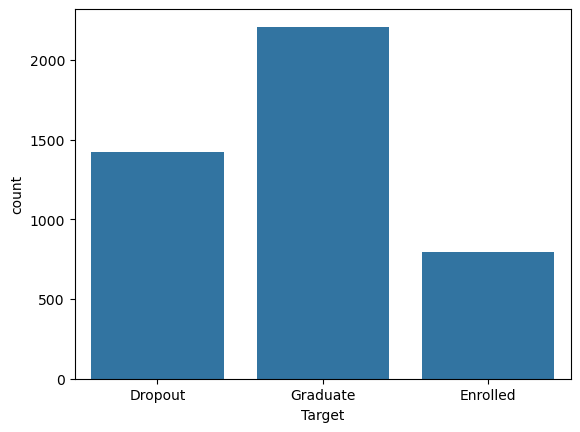

In [223]:
## Understanding distribution of target
sns.countplot(x="Target", data=df)
df["Target"].value_counts()

<span style="color:#42cef5;">

- The target variable consists of three classes: Graduate, Dropout, and Enrolled.

- The distribution is imbalanced, with Graduate being the majority class (2,209), followed by Dropout (1,421), and Enrolled as the minority class (794).

- This class imbalance indicates that the model may become biased toward predicting graduates, which should be considered during model evaluation. Apart from accuracy, using F1-score or recall may be better for this dataset, especially if identifying dropout studenets is a key objective.
</span>

<h3 style="text-align: left; color: #1f77b4;">2.3.1.2 Understanding distribution of features

<Axes: xlabel='Age at enrollment', ylabel='Count'>

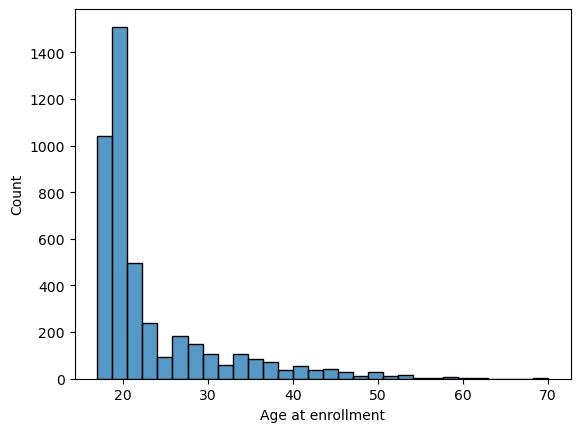

In [224]:
## Understanding distribution of features
sns.histplot(df["Age at enrollment"], bins=30)

<span style="color:#42cef5;">

- The age distribution is right-skewed, with most students enrolling between 18–22 years old and a small number of mature students forming a long tail.

- A small number of older students form outliers relative to the main age distribution, but these values appear valid and should be retained.
</span>

Text(0.5, 0, 'Scholarship Holder')

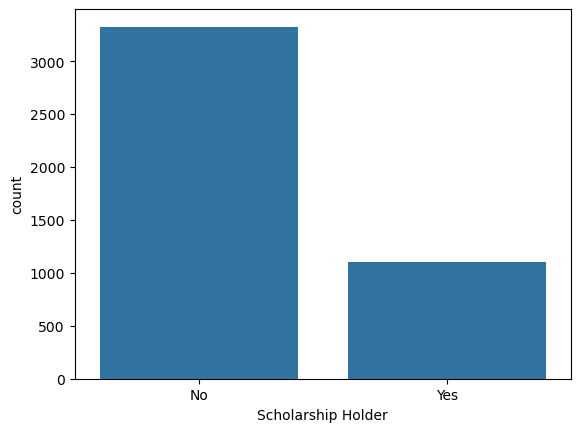

In [225]:
sns.countplot(x=df["Scholarship holder"].map({0: "No", 1: "Yes"}))
plt.xlabel("Scholarship Holder")


<span style="color:#42cef5;">
- Most students are not scholarship holders, with scholarship recipients forming a smaller minority.
</span>

<h3 style="text-align: left; color: #1f77b4;">2.3.2 Understanding relationship between variables

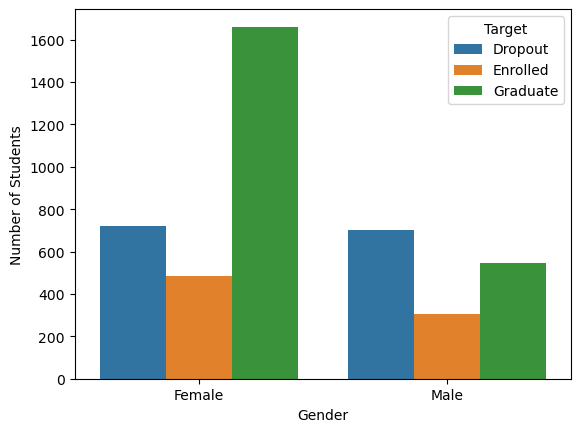

In [226]:
## Understanding relationship between variables
sns.countplot(x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'], data=df)
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

<span style="color:#42cef5;">

- Female students make up a larger proportion of the dataset and therefore have higher counts across all outcome categories. Among females, the graduate outcome is the most common, followed by dropout and enrolled.

- Male students show a higher relative proportion of dropouts compared to graduates when contrasted with females, suggesting that gender may have an association with student outcomes. However, since females are more represented overall, conclusions should be drawn by considering proportions rather than absolute counts.
</span>

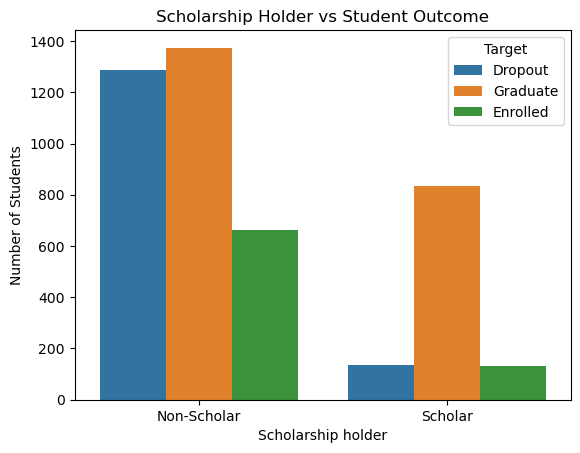

In [227]:
## Understanding relationship between variables
sns.countplot(x="Scholarship holder", hue="Target", data=df)
plt.title("Scholarship Holder vs Student Outcome")
plt.xticks(ticks=[0,1], labels=['Non-Scholar','Scholar'])
plt.ylabel('Number of Students')
plt.show()

<span style="color:#42cef5;">

- Non-scholarship students form the majority of the dataset and therefore account for most outcomes across all categories. Among non-scholars, dropout and graduate counts are relatively close, indicating mixed academic outcomes.

- In contrast, scholarship holders show a much higher number of graduates and significantly fewer dropouts, suggesting a strong association between scholarship status and successful academic completion. This may reflect higher academic ability, financial stability, or increased institutional support among scholarship recipients.
</span>

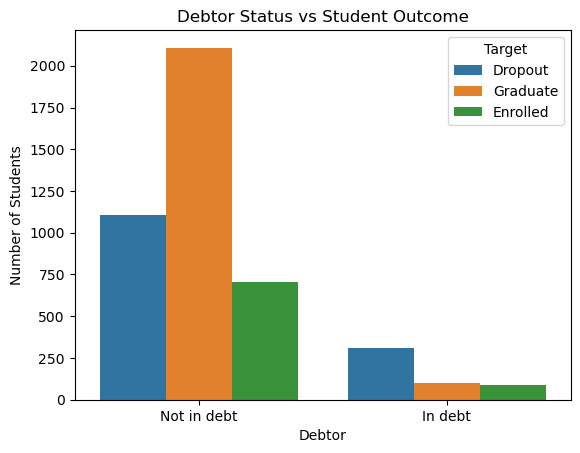

In [228]:
## Understanding relationship between variables
sns.countplot(x="Debtor", hue="Target", data=df)
plt.title("Debtor Status vs Student Outcome")
plt.ylabel('Number of Students')
plt.xticks(ticks=[0,1], labels=['Not in debt','In debt'])
plt.show()

<span style="color:#42cef5;">

- Students who are not in debt make up the majority of the dataset and show a much higher number of graduates compared to dropouts. This suggests that financial stability is associated with more favorable academic outcomes.

- In contrast, students in debt exhibit a noticeably higher proportion of dropouts and significantly fewer graduates. This indicates that being in debt may be a strong risk factor for academic discontinuation.

- Overall, debtor status appears to have a strong association with student outcomes, making it a potentially important predictive feature for identifying at-risk students.
</span>

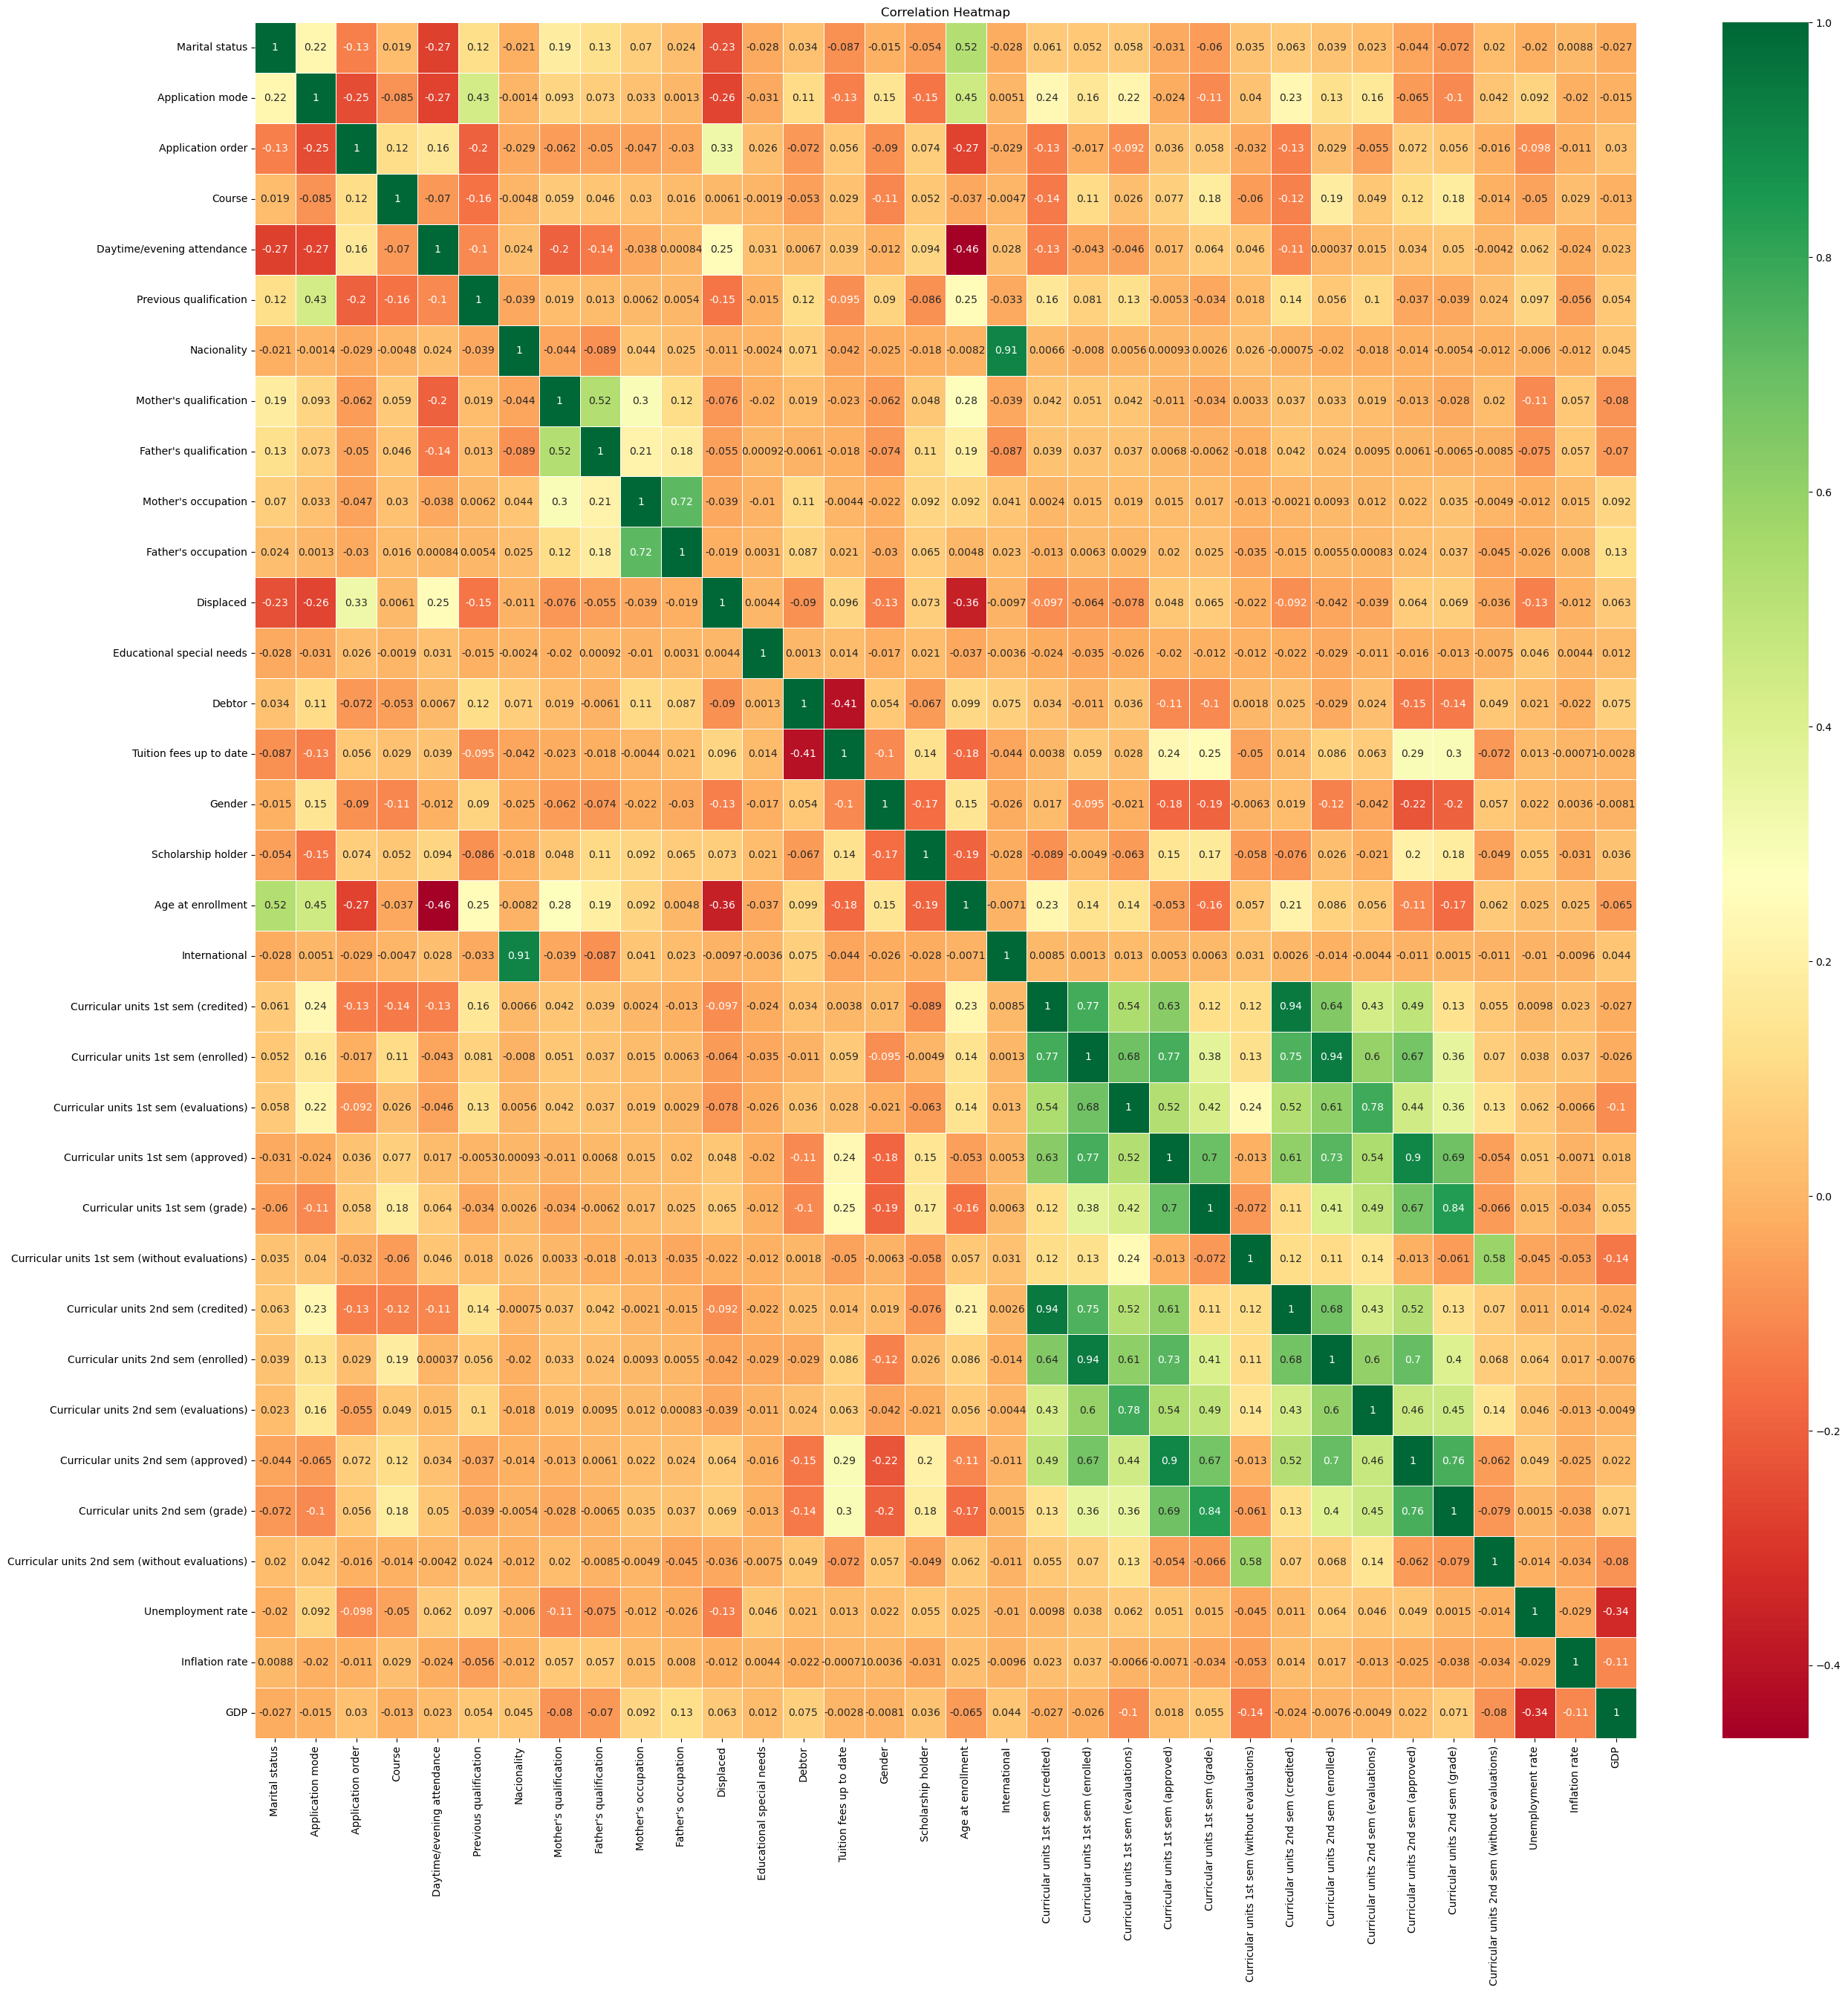

In [229]:
corr = df.select_dtypes(include="number").corr()

plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, cmap="RdYlGn", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<span style="color:#42cef5;">

- A threshold of 0.1 was chosen to balance dimensionality reduction and information retention, removing features with minimal linear correlation while avoiding overly aggressive feature elimination.

- Based on this threshold, the following features exhibit very low correlation with the target outcome and may contribute limited predictive value:

- Nationality, Mother’s qualification, and Father’s qualification, which show correlations close to zero, suggesting minimal association with student outcomes.

- Educational special needs and International status, both of which display negligible correlations with the target variable.

- Curricular units 1st semester (without evaluations), which has a relatively weak correlation compared to other academic performance features.

- Unemployment rate and inflation rate, which also demonstrate minimal correlation at the individual student level.

- While these variables show weak linear relationships with the target variable, feature removal should not rely solely on correlation analysis. 

- Some features may still hold contextual or non-linear importance, particularly for certain model types. Therefore, it is recommended to evaluate model performance with and without these features before making final feature selection decisions.
</span>

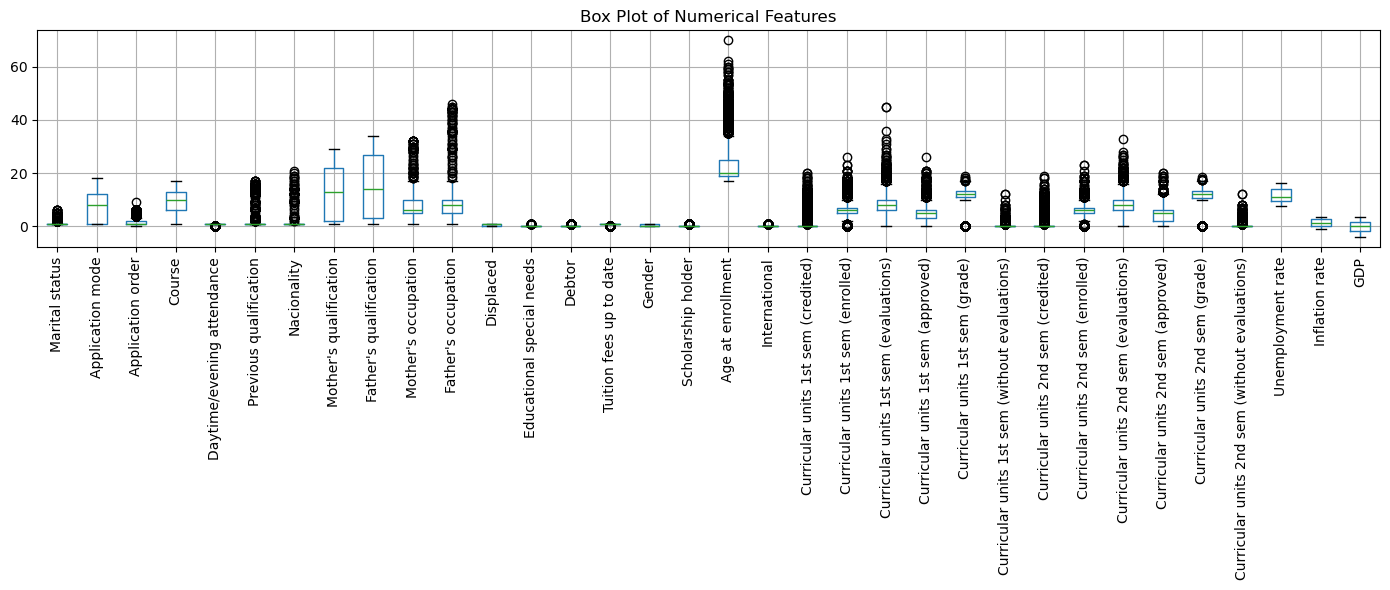

In [230]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, 6))
df[num_cols].boxplot(rot=90)
plt.title("Box Plot of Numerical Features")
plt.tight_layout()
plt.show()

<span style="color:#42cef5;">
The box plots reveal the presence of numerous outliers across several numerical features. These values will be intentionally retained during data preparation, as they represent legitimate variations in student academic performance and enrollment behaviour rather than data entry errors. Removing such observations could eliminate important signals related to extreme academic outcomes, which are critical for accurately identifying students at risk of dropping out. 

<h1 style="text-align: left; color: #1f77b4;"><strong>3. Data Preparation

<h3 style="text-align: left; color: #1f77b4;">3.1 Data Cleaning

In [231]:
## Standardising column names
df.columns = (
    df.columns
    .str.strip() # Remove leading and trailing whitespace from column names
    .str.replace(" ", "_") # Replace spaces with underscores for cleaner variable-style names
    .str.replace("/", "_")  # Replace forward slashes with underscores to avoid parsing issues
    .str.replace("(", "", regex=False) # Remove opening parentheses
    .str.replace(")", "", regex=False)  # Remove closing parentheses
    .str.replace("'", "", regex=False)  # Remove apostrophes to prevent string and syntax issues
)

<span style="color:#42cef5;">Standardises the dataset column names to ensure consistency and avoid issues during feature engineering and manipulating of data

In [232]:
## Fixing specific column names
df = df.rename(columns={
    "Nacionality": "Nationality", # Correct misspelt column name
    "Age_at_enrollment": "Age" # Simplify column name for easier reference
})

<span style="color:#42cef5;">Corrects inconsistent and misspelt column names to improve clarity and readability

In [233]:
df.columns.tolist()

['Marital_status',
 'Application_mode',
 'Application_order',
 'Course',
 'Daytime_evening_attendance',
 'Previous_qualification',
 'Nationality',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Displaced',
 'Educational_special_needs',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'Age',
 'International',
 'Curricular_units_1st_sem_credited',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_without_evaluations',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP',
 'Target']

<span style="color:#42cef5;">Checking whether the columns have been corrected properly

In [234]:
## Defining what are the categorical columns in the dataset
categorical_cols = [
    "Marital_status",
    "Application_mode",
    "Application_order",
    "Course",
    "Daytime_evening_attendance",
    "Previous_qualification",
    "Nationality",
    "Mothers_qualification",
    "Fathers_qualification",
    "Mothers_occupation",
    "Fathers_occupation",
    "Displaced",
    "Educational_special_needs",
    "Debtor",
    "Tuition_fees_up_to_date",
    "Gender",
    "Scholarship_holder",
    "International",
    "Target"
]

In [235]:
## Cast the selected columns to categorical data type
df[categorical_cols] = df[categorical_cols].astype("category")

<span style="color:#42cef5;">I have defined which variables in the dataset are categorical in nature

In [236]:
from sklearn.preprocessing import OrdinalEncoder

## Initialize an OrdinalEncoder for the target classes
target_encoder = OrdinalEncoder(
    categories=[["Dropout", "Enrolled", "Graduate"]]
)

## The order reflects the target variable into numerical form
df["target_encoded"] = target_encoder.fit_transform(df[["Target"]])

<span style="color:#42cef5;">The target variable was ordinally encoded to  convert categorical class labels into numerical values for model training.

In [237]:
## Manually define a target mapping
target_map = {
    "Dropout": 0,
    "Enrolled": 1,
    "Graduate": 2
}

## Apply manual mapping to create the encoded target column
df["target_encoded"] = df["Target"].map(target_map)

## Remove the original categorical target column after encoding
df = df.drop(columns=["Target"])

<span style="color:#42cef5;">The target variable was manually mapped to numerical labels, Dropout = 0, Enrolled = 1, Graduate = 2. The original target column was removed after encoding

In [238]:
## Define columns that I identified early as non contributory for modelling
dropped_cols = [
    "Nationality",
    "International",
    "Educational_special_needs"
]

## Drop selected columns from the dataset
df = df.drop(columns=dropped_cols)

<span style="color:#42cef5;">Previously, I have determined that Nationality, International, Educational_special_needs does not help me in predicting whether student  will dropout or not. Therefore, I am dropping these columns.

In [239]:
## Inspect dataset structure after preprocessing
df.info()

## Verify target class distribution
df["target_encoded"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 32 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   category
 1   Application_mode                              4424 non-null   category
 2   Application_order                             4424 non-null   category
 3   Course                                        4424 non-null   category
 4   Daytime_evening_attendance                    4424 non-null   category
 5   Previous_qualification                        4424 non-null   category
 6   Mothers_qualification                         4424 non-null   category
 7   Fathers_qualification                         4424 non-null   category
 8   Mothers_occupation                            4424 non-null   category
 9   Fathers_occupation                            4424 n

target_encoded
2    2209
0    1421
1     794
Name: count, dtype: int64

In [240]:
## Convert the encoded target variable from category to integer typeto ensure the target labels 
## are stored as discrete class values

df["target_encoded"] = df["target_encoded"].astype(int)
df["target_encoded"].dtype

dtype('int64')

<span style="color:#42cef5;">The target variable was cast to an interger type to enforce discrete class representation and maintain compatibility with classification algorithms

<h3 style="text-align: left; color: #1f77b4;">3.2 Train-Test Split

In [241]:
## Split data into train set and test set
X = df.drop(columns=["target_encoded"])
y = df["target_encoded"]

from sklearn.model_selection import train_test_split

## Split the dataset into 80/20 
## Stratify by target to preserve class distribution in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


<span style="color:#42cef5;">The dataset was split into an 80/20 train-test set using stratification to maintain class balance

In [242]:
## Apply OHE to categorical features in training set
X_train_enc = pd.get_dummies(X_train, drop_first=True)

## Apply OHE to categorical features in test set
X_test_enc = pd.get_dummies(X_test, drop_first=True)

# Align train and test features using training set as reference
# Missing columns in test set are filled with zeros
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join="left", axis=1, fill_value=0)

<span style="color:#42cef5;">One hot encoding was applied to categorical variables, followed by feature alignment to maintain identical column structure between training and test sets

<h1 style="text-align: left; color: #1f77b4;"><strong>4. Modelling

<h3 style="text-align: left; color: #1f77b4;">4.1 Train Model

In [243]:
## Initialise and train model (Logistic Regression)
from sklearn.linear_model import LogisticRegression

lr_baseline = LogisticRegression(
    max_iter=2000,
    class_weight="balanced", ## Use balanced class weights to compensate for imbalanced target classes
    random_state=42
)

lr_baseline.fit(X_train_enc, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


<span style="color:#42cef5;">A Logistic Regression baseline model was trained with balanced class weights to address class imbalance.

In [244]:
## Initialise and train model (Decision Tree Classifier)
from sklearn.tree import DecisionTreeClassifier

dt_baseline = DecisionTreeClassifier(
    class_weight="balanced", ## Use balanced class weights to compensate for imbalanced target classes
    random_state=42
)

dt_baseline.fit(X_train_enc, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


<span style="color:#42cef5;">A Decision Tree baseline model was trained with balanced class weights to address class imbalance.

In [245]:
## Initialise and train model (Random Forest Classifier)
from sklearn.ensemble import RandomForestClassifier

rf_baseline = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced" ## Use balanced class weights to compensate for imbalanced target classes
)

rf_baseline.fit(X_train_enc, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<span style="color:#42cef5;">A Random Forest baseline model was trained with balanced class weights to address class imbalance.

In [246]:
## Initialise and train model (Gradient Boosting Classifier)
from sklearn.ensemble import GradientBoostingClassifier

gb_baseline = GradientBoostingClassifier(
    random_state=42
)

gb_baseline.fit(X_train_enc, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


<span style="color:#42cef5;">A Gradient Boosting baseline model was trained, however for Gradient Boosting, i cannot include balanced class weights

<h1 style="text-align: left; color: #1f77b4;"><strong> 5. Model Evaluation

In [247]:
## Evaluate model (Logistic Regression)
from sklearn.metrics import ( accuracy_score, balanced_accuracy_score, f1_score, confusion_matrix, classification_report )

y_pred_lr = lr_baseline.predict(X_test_enc)

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_lr))
print("Macro F1:", f1_score(y_test, y_pred_lr, average="macro"))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results
Accuracy: 0.727683615819209
Balanced Accuracy: 0.6989462506181018
Macro F1: 0.6887115500005773

Confusion Matrix:
[[198  62  24]
 [ 28  97  34]
 [ 16  77 349]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.70      0.75       284
           1       0.41      0.61      0.49       159
           2       0.86      0.79      0.82       442

    accuracy                           0.73       885
   macro avg       0.70      0.70      0.69       885
weighted avg       0.76      0.73      0.74       885



<span style="color:#42cef5;">

- The Logistic Regression model demonstrates moderate overall perforamnce, with an accuracy of 0.72. However, given the imbalanced nature of the target variable, accuracy metric alone is not enough to assess model effectiveness. Balanced accuracy 0.69 and macro F1-score 0.68 provide a reliable indication of performance across all classes and suggest the model can handle class imbalance reasonably but not the most optimal

- The model perform well in identifying the Graduate class, achieving high precision 0.86, recall 0.79, and F1-score 0.82. This indicates that the model is strongly biased toward correctly predicting the majority class. The Dropout class is also predicted with acceptable performance, with an F1-score of 0.75, which is valuable for identifying student at risk of dropping out.

- In contrast, the enrolled class is the weakest for this model with low precision of 0.41 and F1-score of 0.49. The confusion matrix shows substantial misclassification of Enrolled students as either Dropout or Graduate, suggesting to me that the linear decision boundaries of Logistic Regression struggle to separate this intermediate outcome. 

- Overall, the model remains limited by its linear nature. Logistic Regression is suitable as a baseline model but not sufficient to capture complex relationships. More expressive models such as trees are likely required to improve performance.
</span>

In [248]:
## Evaluate model (Decision Tree)
y_pred_dt = dt_baseline.predict(X_test_enc)

print("Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_dt))
print("Macro F1:", f1_score(y_test, y_pred_dt, average="macro"))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Results
Accuracy: 0.6903954802259887
Balanced Accuracy: 0.6202006331127339
Macro F1: 0.6195144729726488

Confusion Matrix:
[[204  45  35]
 [ 53  55  51]
 [ 36  54 352]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       284
           1       0.36      0.35      0.35       159
           2       0.80      0.80      0.80       442

    accuracy                           0.69       885
   macro avg       0.62      0.62      0.62       885
weighted avg       0.69      0.69      0.69       885



<span style="color:#42cef5;">

- As mentioned, due to imbalanced nature of target variable, I do not rely on accuracy alone to assess model effectiveness. The balanced accuracy 0.62, and macro F1-score 0.62 suggest to me that the model struggles to perform consistently across all classes.

- I observe that the model performs well in identifying the Graduate class, achieving high precision 0.80, recall 0.80 and F1-score 0.80. The Dropout class is also predicted with acceptable performance, with an F1-score of 0.71, which is useful for identifying students at risk of dropping out.

- In contrast the Enrolled class is also clearly the weakest with low precision 0.36, recall 0.35 and F1-score 0.35. From the confusion matrix, I can see substantial misclassification of Enrolled as either Dropout or Graduate, suggesting that Decision Tree has difficulty learning clear boundaries for this intermediate outcome.

- Overall, I find that Decision Tree struggles with class separation and generalization. More robust ensemble based approaches are required to improve the performance.
</span>

In [249]:
## Evaluate model (Random Forest)
y_pred_rf = rf_baseline.predict(X_test_enc)

print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_rf))
print("Macro F1:", f1_score(y_test, y_pred_rf, average="macro"))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results
Accuracy: 0.7570621468926554
Balanced Accuracy: 0.6591589912469686
Macro F1: 0.6674934070988946

Confusion Matrix:
[[210  26  48]
 [ 41  49  69]
 [ 11  20 411]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       284
           1       0.52      0.31      0.39       159
           2       0.78      0.93      0.85       442

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885



<span style="color:#42cef5;">

- The Random Forest model shows improved overall performance, achieving an accuracy of 0.76. However due to class imbalance, I focus more on balanced accuracy 0.66 and macro F1-score 0.67, which indicate moderate but uneven performance across classes.

- The model performs well in predicting the Graduate class, with high precision 0.78, recall 0.93, and F1-score 0.85. This indiciates Random Forest is effective as capturing patterns associated with students who can Graduate. The Dropout class is also predicted quite well, achieving an F1-score of 0.77, which is valuable for identifying students at risk.

- Similar to DT and LR, the Enrolled class remains the weakest with a low recall 0.31, and an F1-score of 0.39. Many Enrolled students are misclassified as either Dropout or Graduate, suggesting that even with ensemble learning, the intermediate nature of this class remains difficult to identify.

- Overall, I find that the Random Forest provides a clear improvement from LR and a single DT by capturing more complex, non-linear relationships. However, its limitations in distinguishing the Enrolled class indicate the further tuning or performing of feature engineering is needed to acheive better
</span>

In [250]:
## Evaluate model (Gradient Boosting)
y_pred_gb = gb_baseline.predict(X_test_enc)

print("Gradient Boosting Results")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_gb))
print("Macro F1:", f1_score(y_test, y_pred_gb, average="macro"))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Results
Accuracy: 0.7593220338983051
Balanced Accuracy: 0.6677146842846926
Macro F1: 0.6754840669213394

Confusion Matrix:
[[214  27  43]
 [ 41  53  65]
 [ 12  25 405]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       284
           1       0.50      0.33      0.40       159
           2       0.79      0.92      0.85       442

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.68       885
weighted avg       0.74      0.76      0.75       885



<span style="color:#42cef5;">

- The Gradient Boosting model achieves an accuracy of 0.76, which is comparable to RF model. Given the imbalanced target variable, I focus more on balanced accurcy 0.67, and macro F1-score 0.68, which indicate slightly more consistent performance across classes than RF.

- I observe strong performance in predicting the Graduate class, with high recall 0.92 and F1-score of 0.85, and predicting well for Dropout class with F1-score 0.78. This suggests that Gradient Boosting is effective at capturing non-linear patterns in the data.

- However, Enrolled class remains challenging with low recall 0.33 and an F1-score of 0.40. Similar reasons to RF, DT and LR.

- Overall, Gradient Boosting offers a marginal improvement in balanced performance, but further tuning or feature engineering is still needed to better distinguish imtermediate outcomes.
</span>

<h3 style="text-align: left; color: #1f77b4;">5.1 Testing on new data

In [251]:
## New data
new_data = {
    "Marital_status": 1,
    "Application_mode": 1,
    "Application_order": 1,
    "Course": 33,
    "Daytime_evening_attendance": 1,
    "Previous_qualification": 1,
    "Mother_qualification": 19,
    "Father_qualification": 19,
    "Mother_occupation": 9,
    "Father_occupation": 9,
    "Displaced": 0,
    "Debtor": 0,
    "Tuition_fees_up_to_date": 1,
    "Gender": 1,
    "Scholarship_holder": 0,
    "Age": 20,
    "Curricular_units_1st_sem_credited": 6,
    "Curricular_units_1st_sem_enrolled": 6,
    "Curricular_units_1st_sem_evaluations": 6,
    "Curricular_units_1st_sem_approved": 5,
    "Curricular_units_1st_sem_grade": 12,
    "Curricular_units_2nd_sem_credited": 6,
    "Curricular_units_2nd_sem_enrolled": 6,
    "Curricular_units_2nd_sem_evaluations": 6,
    "Curricular_units_2nd_sem_approved": 6,
    "Curricular_units_2nd_sem_grade": 13,
    "GDP": 1.5
}

new_df = pd.DataFrame([new_data])

<span style="color:#42cef5;">A single student record was manually constructed to simulate input data for model inference.

In [252]:
## OHE new data
new_df_enc = pd.get_dummies(new_df, drop_first=True)

# Align with training features
new_df_enc = new_df_enc.reindex(
    columns=X_train_enc.columns,
    fill_value=0
)

<span style="color:#42cef5;">Since this is a new data, it was one-hot encoded and aligned to the training feature set to ensure consistent input dimensions.

In [253]:
## Predicting with new data
new_pred = gb_baseline.predict(new_df_enc)[0]
new_pred_proba = gb_baseline.predict_proba(new_df_enc)[0]

label_map = {
    0: "Dropout",
    1: "Enrolled",
    2: "Graduate"
}

print("Predicted Outcome:", label_map[new_pred])
print("Prediction Probabilities:")
print({
    "Dropout": new_pred_proba[0],
    "Enrolled": new_pred_proba[1],
    "Graduate": new_pred_proba[2]
})

Predicted Outcome: Dropout
Prediction Probabilities:
{'Dropout': np.float64(0.6452261410372879), 'Enrolled': np.float64(0.05378993708271356), 'Graduate': np.float64(0.3009839218799985)}


<span style="color:#42cef5;">The Gradient Boosting model predicted a Dropout outcome despite the input values being close to the dataset median, where students typically graduate. This can suggest that GB is quite sensitive to specific feature interations and local decision boundaries, which may cause it to overweight certain risk-related attribute even when overall academic performance appears average.

In [254]:
## Predicting with new data
new_pred = rf_baseline.predict(new_df_enc)[0]
new_pred_proba = rf_baseline.predict_proba(new_df_enc)[0]

label_map = {
    0: "Dropout",
    1: "Enrolled",
    2: "Graduate"
}

print("Predicted Outcome:", label_map[new_pred])
print("Prediction Probabilities:")
print({
    "Dropout": new_pred_proba[0],
    "Enrolled": new_pred_proba[1],
    "Graduate": new_pred_proba[2]
})

Predicted Outcome: Graduate
Prediction Probabilities:
{'Dropout': np.float64(0.43), 'Enrolled': np.float64(0.08), 'Graduate': np.float64(0.49)}


<span style="color:#42cef5;">

The Random Forest model predicted a Graduate outcome for the simulated student profile. While the distribution indicates some risk of dropout 0.43, the highest likelihood was assigned to Graduate 0.49, suggesting a more balanced and realistic assessment compared to Gradient Boosting.

I believe with further tuning I can make the prediction more stable

<h3 style="text-align: left; color: #1f77b4;">5.2 Conclusion for baseline model

<span style="color:#42cef5;">

Conclusion for baseline model

- Even though Gradient Boosting predicted Dropout, I am hesitant to rely on it at this stage as the features are still relatively raw. I selected Random Forest as the final baseline model because it demonstrated the most balanced and reliable performance across evaluation metrics.

- Random Forest performs well for both the Graduate and Dropout classes, which are the most critical outcomes, while reducing variance and overfitting through ensemble learning. Its prediction on unseen data was also more balanced rather than overly confident, suggesting more stable decision-making.

- With further feature engineering and selection, I believe Random Forest can be refined to achieve better overall performance.

<h1 style="text-align: left; color: #1f77b4;"><strong>6. Iterative model development

<h3 style="text-align: center; color: #ff7d99;">Overview
<br>

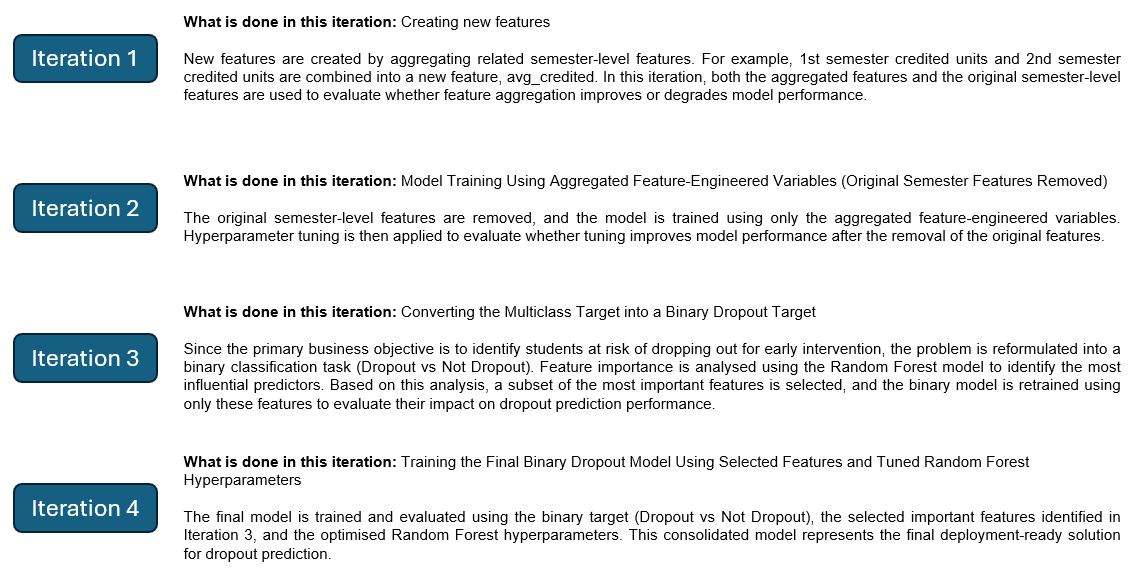

<h3 style="text-align: left; color: #1f77b4;">6.1 Iteration 1 - Creating new features (Featuring Engineering)


In [255]:
df_fe = df.copy()

<span style="color:#42cef5;">
Creating these features on a copied dataset to help ensure that the original dataset remains untouched. Helps to preserve data integrity and allowing for reproducibility and comparing with baseline model

In [256]:
df_fe["avg_credited"] = df_fe[[
    "Curricular_units_1st_sem_credited",
    "Curricular_units_2nd_sem_credited"
]].mean(axis=1)

df_fe["avg_enrolled"] = df_fe[[
    "Curricular_units_1st_sem_enrolled",
    "Curricular_units_2nd_sem_enrolled"
]].mean(axis=1)

df_fe["avg_evaluations"] = df_fe[[
    "Curricular_units_1st_sem_evaluations",
    "Curricular_units_2nd_sem_evaluations"
]].mean(axis=1)

df_fe["avg_approved"] = df_fe[[
    "Curricular_units_1st_sem_approved",
    "Curricular_units_2nd_sem_approved"
]].mean(axis=1)

df_fe["avg_grade"] = df_fe[[
    "Curricular_units_1st_sem_grade",
    "Curricular_units_2nd_sem_grade"
]].mean(axis=1)

<span style="color:#42cef5;">

- To reduce redundacy and improve interretability, semester related variables were aggregated into average features. By computing the mean of corresponding 1st and 2nd semester values, the engineered features provide a more holistic representation of a student's overall academic performance rather than treating each semester in isolation. 

- Afterall, the student outcome (dropout or not dropout) are influenced by performance across the academic year rather than a single semester. 
</span>

In [257]:
df_fe[["avg_credited","avg_enrolled","avg_evaluations","avg_approved","avg_grade"]].head()

,avg_credited,avg_enrolled,avg_evaluations,avg_approved,avg_grade
0,0.0,0.0,0.0,0.0,0.000000
1,0.0,6.0,6.0,6.0,13.833333
2,0.0,6.0,0.0,0.0,0.000000
3,0.0,6.0,9.0,5.5,12.914286
4,0.0,6.0,7.5,5.5,12.666667


<span style="color:#42cef5;">

- A preliminary inspection of the engineered features confirms that the aggregation process was applied correctly and preserves meaningful academic patterns. Students with no academic participation across both semesters exhibit zero values for all averaged metrics, accurately reflecting inactive or early-dropout cases. 

- For students who were actively enrolled, the averaged features capture consistent engagement levels,nwhile allowing fractional values when performance differed between semesters, resulting in a smoothed and realistic representation of academic progression. The averaged grade values remain within the expected grading range, indicating that no distortion was introduced during feature transformation. 

- Overall, the engineered features successfully consolidate semester-level information into interpretable and predictive variables, validating their suitability for downstream modeling.
</span>

In [258]:
## Rebuildng X, y using the engineered features
## Convert the encoded target variable from category to integer typeto ensure the target labels 
## are stored as discrete class values
X = df_fe.drop(columns=["target_encoded"])
y = df_fe["target_encoded"].astype(int)

In [259]:
from sklearn.model_selection import train_test_split

## Split the dataset into 80/20 
## Stratify by target to preserve class distribution in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [260]:
## Apply OHE to categorical features in training set
X_train_enc = pd.get_dummies(X_train, drop_first=True)

## Apply OHE to categorical features in test set
X_test_enc = pd.get_dummies(X_test, drop_first=True)

# Align train and test features using training set as reference
# Missing columns in test set are filled with zeros
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join="left", axis=1, fill_value=0)

In [261]:
rf_iter1 = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced" ## Use balanced class weights to compensate for imbalanced target classes
)

rf_iter1.fit(X_train_enc, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<span style="color:#42cef5;">Whatever i have done up to this point I have explained back in Part 4. Therefore i will not go in depth on the code.

In [262]:
y_pred_rf = rf_iter1.predict(X_test_enc)

print("Random Forest Iteration 1 Results After Feature Engineering")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_rf))
print("Macro F1:", f1_score(y_test, y_pred_rf, average="macro"))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Iteration 1 Results After Feature Engineering
Accuracy: 0.7649717514124293
Balanced Accuracy: 0.6723245455639821
Macro F1: 0.6804678468846385

Confusion Matrix:
[[216  24  44]
 [ 43  53  63]
 [  9  25 408]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       284
           1       0.52      0.33      0.41       159
           2       0.79      0.92      0.85       442

    accuracy                           0.76       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885



<h5 style="text-align: center; color: #ff7d99;">Baseline Model VS Feature Engineered Model

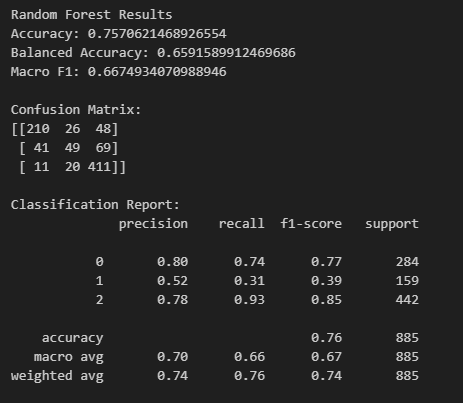 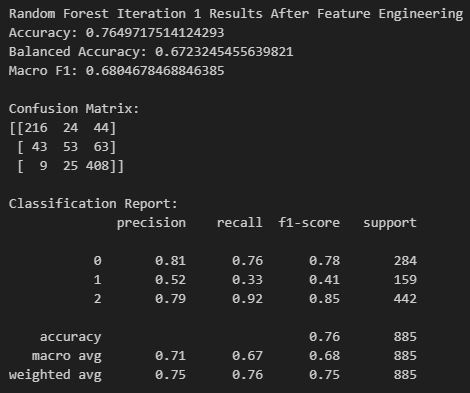

<span style="color:#42cef5;">

- After the first feature engineering iteration, the Random Forest model showed a modest but consistent performance improvement, with accuracy increasing from 0.757 to 0.765 and macro F1-score improving from 0.667 to 0.681. Balanced accuracy also increased slightly, indicating improved class-level performance. 

- Importantly, the original semester-level features used to compute the averaged variables were not removed at this stage, allowing the model to retain both granular and aggregated academic information. This validates that the engineered features add complementary predictive value without negatively impacting model stability.

<h3 style="text-align: left; color: #1f77b4;">6.1.1 Iteration 1 - Finding the best parameters (Hyperparameters Tuning)

In [263]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring="f1_macro",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_random.fit(X_train_enc, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,20
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [264]:
print("Best Params:", rf_random.best_params_)
print("Best CV Macro F1:", rf_random.best_score_)

Best Params: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Best CV Macro F1: 0.7072244842661134


<span style="color:#42cef5;">RandomizedSearchCV was appliedd to optimise the Random Forest model by sampling a range of key hyperparameters. Macro F1-score was used as the evaluation metric to ensure balanced performance across all classes, with class weighting applied to address target imbalance

In [265]:
from sklearn.metrics import ( accuracy_score, balanced_accuracy_score, f1_score, confusion_matrix, classification_report, recall_score, precision_score )

rf_tuned = rf_random.best_estimator_
y_pred_rf = rf_tuned.predict(X_test_enc)

print("Random Forest Tuned (Iteration 1 - After Tuning) Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_rf))
print("Macro F1:", f1_score(y_test, y_pred_rf, average="macro"))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Tuned (Iteration 1 - After Tuning) Results
Accuracy: 0.768361581920904
Balanced Accuracy: 0.7165323443168091
Macro F1: 0.7168125823109103

Confusion Matrix:
[[204  48  32]
 [ 32  88  39]
 [ 12  42 388]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       284
           1       0.49      0.55      0.52       159
           2       0.85      0.88      0.86       442

    accuracy                           0.77       885
   macro avg       0.72      0.72      0.72       885
weighted avg       0.77      0.77      0.77       885



<h5 style="text-align: center; color: #ff7d99;">Before Tuning Model VS After Tuning Model

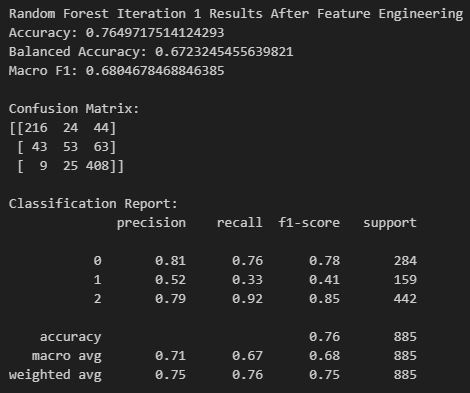 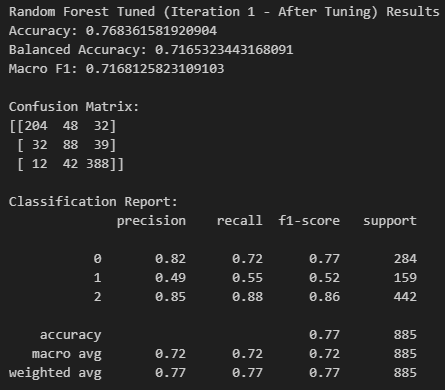

<span style="color:#42cef5;">We can see that after hyperparameters tuning, the model improved. The Balanced Accuracy increased from 0.67 to 0.71 and Macro F1 increased from 0.68 to 0.71. However, this iteration still includes the original features which we will remove in iteration 2, to see if the model works with the aggregated features.

<h3 style="text-align: left; color: #1f77b4;">6.2 Iteration 2 – Model Training Using Aggregated Feature-Engineered Variables
(Original Semester Features Removed)


In [266]:
df_fs = df_fe.copy()

<span style="color:#42cef5;">

- At this stage, the original semester-level academic features used to compute the averaged variables, I will be removing to reduce feature redundancy and potential multicollinearity. 

- This step evaluates whether the aggregated features alone are sufficient to represent students’ academic performance without relying on duplicated semester-specific information. 

- Any performance stability or improvement would indicate that the averaged features successfully capture the essential academic signals required for prediction.

In [267]:
semester_cols_to_drop = [
    "Curricular_units_1st_sem_credited",
    "Curricular_units_2nd_sem_credited",
    "Curricular_units_1st_sem_enrolled",
    "Curricular_units_2nd_sem_enrolled",
    "Curricular_units_1st_sem_evaluations",
    "Curricular_units_2nd_sem_evaluations",
    "Curricular_units_1st_sem_approved",
    "Curricular_units_2nd_sem_approved",
    "Curricular_units_1st_sem_grade",
    "Curricular_units_2nd_sem_grade"
]

df_fs = df_fs.drop(columns=semester_cols_to_drop)
df_fs.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,...,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,target_encoded,avg_credited,avg_enrolled,avg_evaluations,avg_approved,avg_grade
0,1,8,5,2,1,1,13,10,6,10,...,0,10.8,1.4,1.74,0,0.0,0.0,0.0,0.0,0.000000
1,1,6,1,11,1,1,1,3,4,4,...,0,13.9,-0.3,0.79,2,0.0,6.0,6.0,6.0,13.833333
2,1,1,5,5,1,1,22,27,10,10,...,0,10.8,1.4,1.74,0,0.0,6.0,0.0,0.0,0.000000
3,1,8,2,15,1,1,23,27,6,4,...,0,9.4,-0.8,-3.12,2,0.0,6.0,9.0,5.5,12.914286
4,2,12,1,3,0,1,22,28,10,10,...,0,13.9,-0.3,0.79,2,0.0,6.0,7.5,5.5,12.666667


<span style="color:#42cef5;">I droppoed the original semester related features and will only rely on aggregated features to determine if the model is suitable

In [268]:
## Rebuildng X, y using the engineered features
## Convert the encoded target variable from category to integer typeto ensure the target labels 
## are stored as discrete class values
X = df_fs.drop(columns=["target_encoded"])
y = df_fs["target_encoded"].astype(int)

In [269]:
## Split the dataset into 80/20 
## Stratify by target to preserve class distribution in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [270]:
## Apply OHE to categorical features in training set
X_train_enc = pd.get_dummies(X_train, drop_first=True)

## Apply OHE to categorical features in test set
X_test_enc = pd.get_dummies(X_test, drop_first=True)

# Align train and test features using training set as reference
# Missing columns in test set are filled with zeros
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join="left", axis=1, fill_value=0)

In [271]:
rf_iter2 = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced" ## Use balanced class weights to compensate for imbalanced target classes
)

rf_iter2.fit(X_train_enc, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<span style="color:#42cef5;">Whatever i have done up to this point I have explained back in Part 4. Therefore i will not go in depth on the code.

In [272]:
y_pred_rf = rf_iter2.predict(X_test_enc)

print("Random Forest Iteration 2 (Feature Selection) Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_rf))
print("Macro F1:", f1_score(y_test, y_pred_rf, average="macro"))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Iteration 2 (Feature Selection) Results
Accuracy: 0.7604519774011299
Balanced Accuracy: 0.658233692163129
Macro F1: 0.66504809037946

Confusion Matrix:
[[212  28  44]
 [ 44  46  69]
 [ 15  12 415]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       284
           1       0.53      0.29      0.38       159
           2       0.79      0.94      0.86       442

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885



<h5 style="text-align: center; color: #ff7d99;">Original Semester Related Features Model VS Using Only Aggregated Feature-Engineered Features Model

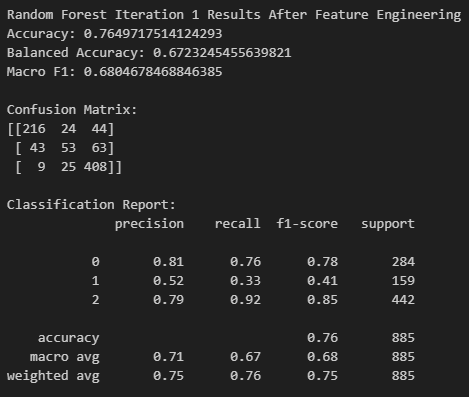 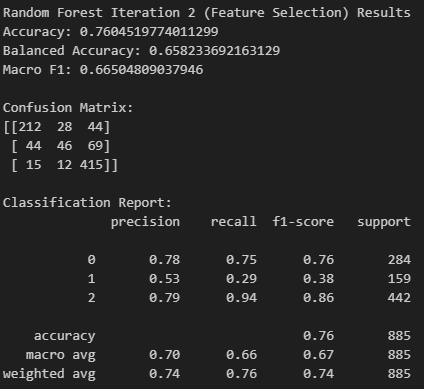

<span style="color:#42cef5;">

- Although a slight decrease in balanced accuracy and macro F1-score was observed after removing the original semester-level features, overall accuracy remained largely stable. 

- This indicates that the aggregated academic features alone are sufficient to capture the core academic performance patterns relevant for prediction. 

- While some fine grained semester related information was lost, retaining only the averaged features reduces redundancy and model complexity, improving interpretability and generalization. Given the minimal performance degradation and improved feature compactness, I decide to proceed using only the averaged features.

- I will conduct hyperparameter tuning for iteration 2 to see if the results improves

<h3 style="text-align: left; color: #1f77b4;">6.2.1 Iteration 2 – Hyperparameter Tuning After Removing Original Semester-Level Features


In [273]:
## Build the same RF base model (for RandomizedSearchCV)
rf_fs = RandomForestClassifier(
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

## Same param distributions as Iteration 1 tuning
param_dist_fs = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

## Randomized search, tune on Iteration 2 encoded train set
rf_random_fs = RandomizedSearchCV(
    estimator=rf_fs,
    param_distributions=param_dist_fs,
    n_iter=20,
    cv=3,
    scoring="f1_macro",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Using Iteration 2 variables, feature-selected X_train_enc / y_train
rf_random_fs.fit(X_train_enc, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,20
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


<span style="color:#42cef5;">For iteration 2 tuning, I will be using the same setup as iteration 1 tuning.

In [274]:
print("Best Params (Iteration 2 - Feature Selection):", rf_random_fs.best_params_)
print("Best CV Macro F1 (Iteration 2 - Feature Selection):", rf_random_fs.best_score_)

Best Params (Iteration 2 - Feature Selection): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}
Best CV Macro F1 (Iteration 2 - Feature Selection): 0.7037874762284524


In [275]:
## Evaluate best estimator on Iteration 2 test set
rf_tuned_fs = rf_random_fs.best_estimator_
y_pred_rf_fs = rf_tuned_fs.predict(X_test_enc)

print("\nRandom Forest Tuned (Iteration 2 - Feature Selection Tuning) Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_fs))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_rf_fs))
print("Macro F1:", f1_score(y_test, y_pred_rf_fs, average="macro"))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_fs))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_fs))


Random Forest Tuned (Iteration 2 - Feature Selection Tuning) Results
Accuracy: 0.7615819209039548
Balanced Accuracy: 0.71334974568471
Macro F1: 0.7109553336264884

Confusion Matrix:
[[204  53  27]
 [ 35  89  35]
 [ 20  41 381]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       284
           1       0.49      0.56      0.52       159
           2       0.86      0.86      0.86       442

    accuracy                           0.76       885
   macro avg       0.71      0.71      0.71       885
weighted avg       0.77      0.76      0.76       885



<h5 style="text-align: center; color: #ff7d99;">Iteration 2 Feature Selection NO Tuning VS Iteration 2 Feature Selection WITH Tuning

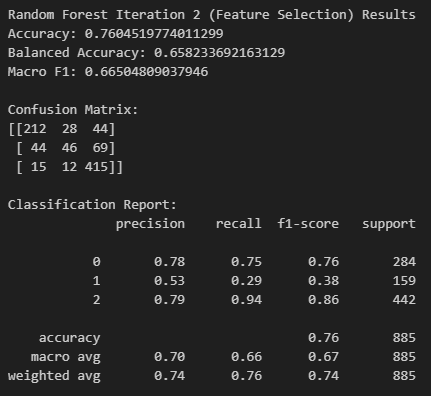 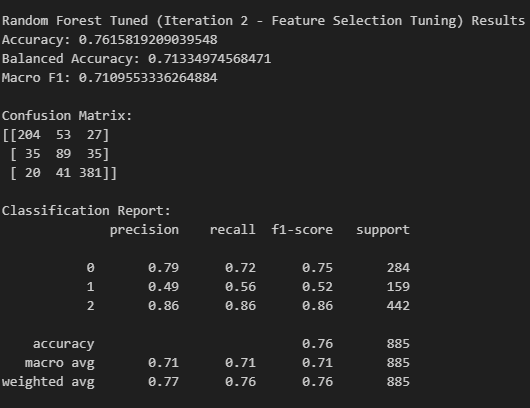

<span style="color:#42cef5;">After hyperparameter tuning in Iteration 2, balanced accuracy improved from 0.65 to 0.71, and macro F1-score increased from 0.66 to 0.71. This indicates that tuning significantly improved class-balanced performance. The results suggest that the model is able to perform effectively using only aggregated semester-related features, without relying on the original raw semester variables.

<h3 style="text-align: left; color: #1f77b4;">6.3 Iteration 3 – Converting the Multiclass Target into a Binary Dropout Target


<span style="color:#42cef5;">In this iteration, the Enrolled class was identified as less informative for assessing dropout risk, as it represents an intermediate state rather than a final academic outcome. To better focus on early risk identification, the target variable was reframed into a binary classification problem: Dropout vs Not Dropout (Enrolled + Graduate)

In [276]:
df_bin = df_fs.copy()

<span style="color:#42cef5;">I copied the dataset from my Iteration 2 where i select only the aggregated semester features.

In [277]:
df_bin["dropout_binary"] = (df_bin["target_encoded"] == 0).astype(int)
df_bin["dropout_binary"].value_counts()

dropout_binary
0    3003
1    1421
Name: count, dtype: int64

<span style="color:#42cef5;">The multi-class target variable was converted into a binary label by assigning 1 to Dropout cases and 0 to non-dropout cases (Enrolled and Graduate). This effectively combines Enrolled and Graduate into a single "Not Dropout" class.

In [278]:
X = df_bin.drop(columns=["target_encoded", "dropout_binary"])
y = df_bin["dropout_binary"]

In [279]:
## Split the dataset into 80/20 
## Stratify by target to preserve class distribution in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [280]:
## Apply OHE to categorical features in training set
X_train_enc = pd.get_dummies(X_train, drop_first=True)

## Apply OHE to categorical features in test set
X_test_enc  = pd.get_dummies(X_test, drop_first=True)

# Align train and test features using training set as reference
# Missing columns in test set are filled with zeros
X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns, fill_value=0)

In [281]:
rf_binary = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42,
    class_weight="balanced"
)

rf_binary.fit(X_train_enc, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,12
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<span style="color:#42cef5;">Whatever i have done up to this point I have explained back in Part 4. Therefore i will not go in depth on the code.

In [282]:
y_pred = rf_binary.predict(X_test_enc)

print("Binary Dropout Model Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Dropout Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Dropout", "Dropout"]))


Binary Dropout Model Results
Accuracy: 0.8689265536723164
Dropout Recall: 0.7711267605633803
Precision: 0.8111111111111111
F1: 0.7906137184115524

Confusion Matrix:
[[550  51]
 [ 65 219]]

Classification Report:
              precision    recall  f1-score   support

 Not Dropout       0.89      0.92      0.90       601
     Dropout       0.81      0.77      0.79       284

    accuracy                           0.87       885
   macro avg       0.85      0.84      0.85       885
weighted avg       0.87      0.87      0.87       885



<span style="color:#42cef5;">

The binary model achieved an overall accuracy of 86.9% with a dropout recall of 77.1%, dinciating that the model is able to correctly identify the majority of at-risk students. The F1-score of 0.79 for the Dropout class reflects a good balance between precision and recall, which is important in early risk detection scenarios where missing a potential dropout is costly.

The confusion matrix shows that while some dropout cases are still misclassified, the model substantially reduces ambiguity compared to multi-class formulation. Overall, reframing the problem as a binary classification improves the model's effectiveness in identifying students at risk of dropping out.

In [283]:
feature_importance = pd.Series(rf_binary.feature_importances_, index=X_train_enc.columns).sort_values(ascending=False)

feature_importance.head(10)

avg_approved                 0.245654
avg_grade                    0.158542
Tuition_fees_up_to_date_1    0.082825
avg_evaluations              0.059596
Age                          0.051735
Scholarship_holder_1         0.029448
avg_enrolled                 0.029209
Debtor_1                     0.024942
GDP                          0.014561
Gender_1                     0.014060
dtype: float64

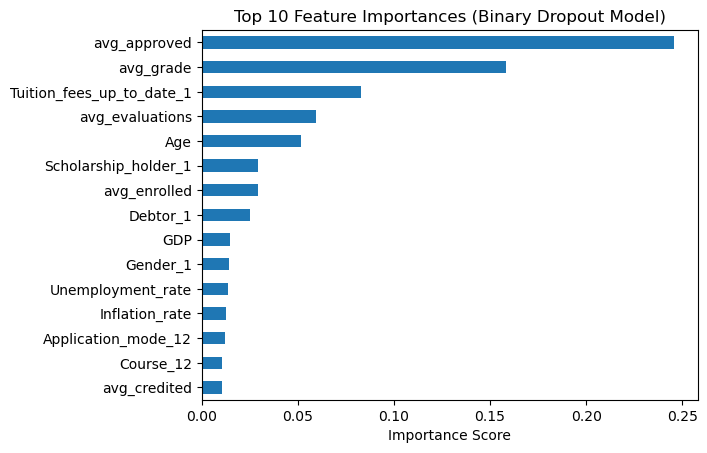

In [284]:
feature_importance.head(15).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Binary Dropout Model)")
plt.xlabel("Importance Score")
plt.show()

<span style="color:#42cef5;">

The feature importance analysis indicates that academic performance indicators dominate the binary dropout prediction. Features such as average modules approved and average grades contribute the most on how the model predict whether the student is at risk of dropping out

Financial and engagement related factors including whether student has fully paid their tuition fees, number of evaluations, and scholorships status, also play a supporting role, while demographic variables such as age and gender exhibit lower influence. 

This suggest that dropout risks are primarily driven by academic performance rather than demographic characteristics.

<h3 style="text-align: left; color: #1f77b4;">6.4 Iteration 4 – Training the Final Binary Dropout Model Using Selected Features and Tuned Hyperparameters



In [285]:
DATASET_PATH = "dataset.csv"
MODEL_OUT = "dropout_binary_model_option1.joblib"
FEATURES_OUT = "dropout_model_features_option1.joblib"
FINAL_FEATURES = [
    "avg_approved",
    "avg_grade",
    "avg_evaluations",
    "Age",
    "Tuition_fees_up_to_date",
    "Debtor",
    "Scholarship_holder",
    "GDP",
    "Inflation_rate",
    "Unemployment_rate",
    "Gender",
]

<span style="color:#42cef5;">

The retained features capture academic performance, financial status, and economic context, which were identified as the most influential factors in predicting dropout risk.

In [286]:
def clean_columns(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df.columns = (
        df.columns
        .str.strip()
        .str.replace(" ", "_")
        .str.replace("/", "_")
        .str.replace("(", "", regex=False)
        .str.replace(")", "", regex=False)
        .str.replace("'", "", regex=False)
    )
    df = df.rename(columns={
        "Nacionality": "Nationality",
        "Age_at_enrollment": "Age"
    })
    return df

<span style="color:#42cef5;">

Similar to what I did in part 3, this function normalises column names by stripping whitespace, removing special characters, and applying consistent naming conventions to support reliable feature handling.

In [287]:
def add_feature_engineering(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    pairs = [
        ("Curricular_units_1st_sem_credited", "Curricular_units_2nd_sem_credited", "avg_credited"),
        ("Curricular_units_1st_sem_enrolled", "Curricular_units_2nd_sem_enrolled", "avg_enrolled"),
        ("Curricular_units_1st_sem_evaluations", "Curricular_units_2nd_sem_evaluations", "avg_evaluations"),
        ("Curricular_units_1st_sem_approved", "Curricular_units_2nd_sem_approved", "avg_approved"),
        ("Curricular_units_1st_sem_grade", "Curricular_units_2nd_sem_grade", "avg_grade"),
    ]

    for c1, c2, out in pairs:
        if c1 in df.columns and c2 in df.columns:
            df[out] = df[[c1, c2]].mean(axis=1)

    return df

<span style="color:#42cef5;">
Semester-level features were aggregated by averaging 1st and 2nd semester values to reduce redundancy, boost generalization and improve interpretability.

In [288]:
def make_binary_target(y: pd.Series) -> pd.Series:
    if y.dtype == "object":
        return (y.str.lower() == "dropout").astype(int)

    return (y == 0).astype(int)

<span style="color:#42cef5;">

The target variable was converted into a binary label, where 1 represents Dropout and 0 represents Not Dropout

In [289]:
from joblib import dump

def main():
    # Load dataset and standardise column names
    df = pd.read_csv(DATASET_PATH)
    df = clean_columns(df)

    # Ensure target column exists before proceeding
    if "Target" not in df.columns:
        raise ValueError("Target column not found in dataset.csv")

    # Apply feature engineering to create aggregated semester features
    df = add_feature_engineering(df)

    # Convert multi-class target into binary target
    # 1 = Dropout, 0 = Not Dropout
    y = make_binary_target(df["Target"])

    # Build feature matrix using ONLY the selected final features
    missing = [c for c in FINAL_FEATURES if c not in df.columns]
    if missing:
        raise ValueError(f"Missing columns in dataset after preprocessing: {missing}")

    X = df[FINAL_FEATURES].copy()

    # Ensure all features are numeric and handle missing values as a precaution
    # Non-numeric values are coerced to NaN and filled using median imputation
    X = X.apply(pd.to_numeric, errors="coerce")
    X = X.fillna(X.median(numeric_only=True))

    # Split data into training and test sets
    # Stratification preserves class distribution due to class imbalance
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

    # Initialise Random Forest classifier with class weighting
    # Class weighting helps mitigate target imbalance
    # This parameters was also the best parameter i found back in iterataion 2, when i did tuning
    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=4,
        max_features="sqrt",
        random_state=42,
        class_weight="balanced",
        n_jobs=-1
    )

    # Train the model on the training set
    rf.fit(X_train, y_train)

    # Evaluate model performance on unseen test data
    y_pred = rf.predict(X_test)

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    # Persist trained model and final feature list for inference
    dump(rf, MODEL_OUT)
    dump(FINAL_FEATURES, FEATURES_OUT)

    print(f"\nSaved model -> {MODEL_OUT}")
    print(f"Saved features -> {FEATURES_OUT}")
    print(f"Final input features: {FINAL_FEATURES}")

# Entry point for script execution
if __name__ == "__main__":
    main()



Confusion Matrix:
[[680  71]
 [ 74 281]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9019    0.9055    0.9037       751
           1     0.7983    0.7915    0.7949       355

    accuracy                         0.8689      1106
   macro avg     0.8501    0.8485    0.8493      1106
weighted avg     0.8686    0.8689    0.8687      1106


Saved model -> dropout_binary_model_option1.joblib
Saved features -> dropout_model_features_option1.joblib
Final input features: ['avg_approved', 'avg_grade', 'avg_evaluations', 'Age', 'Tuition_fees_up_to_date', 'Debtor', 'Scholarship_holder', 'GDP', 'Inflation_rate', 'Unemployment_rate', 'Gender']


<h1 style="text-align: left; color: #1f77b4;"><strong>7. Conclusion


<span style="color:#42cef5;">

This project explored the problem of student dropout prediction using academic, financial, and contextual data. Through multiple iterations, the modelling approach evolved from a multi-class classification task to a more focused binary classification problem, aligning better with the objective of early dropout risk identification.

Feature engineering played a key role in improving model performance. Aggregating semester-level academic features reduced redundancy while preserving meaningful performance trends. Subsequent feature selection and hyperparameter tuning further enhanced model stability and balanced performance across classes. The Random Forest model consistently demonstrated reliable results due to its ability to capture non-linear relationships and its robustness to outliers.

Reframing the target variable into a binary outcome (Dropout vs Not Dropout) significantly improved interpretability and effectiveness. The final binary model achieved strong overall performance, with a high accuracy and a dropout recall of 0.79 and f1-score of 0.80, indicating its ability to identify the majority of at-risk students. Given the imbalanced nature of the dataset, evaluation focused on recall and F1-score rather than accuracy alone.

Overall, the final model serves as an effective early-warning tool that can support educational institutions such as ITE and Polytechnics in identifying potential dropout risks after the first or second semester. While further improvements could be made through additional data and real-world validation, this project demonstrates that early academic indicators can provide valuable insights for understanding and mitigating student attrition.